# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [4]:
data=pd.read_csv("Position_Salaries.csv")

Checking for null values

In [5]:
print(data.isna().sum())

Position    0
Level       0
Salary      0
dtype: int64


In [6]:
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


Removing duplicates....

In [7]:
print(data.size)

30


Dividing dataset into dependent and independent data

In [8]:
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values

We don't need to do the spliting here because we have vary less data which is 10 rows only.


# Feature Scaling...

In [9]:
from sklearn.preprocessing import StandardScaler
x_sc=StandardScaler()
y_sc=StandardScaler()

x_data=x_sc.fit_transform(X)
y_data=y_sc.fit_transform(Y.reshape(-1,1))

# Preparing Support Vector Regression model...

In [10]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf")
svr.fit(x_data,y_data)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting the test data by using Regression model

In [11]:
y_pred=svr.predict(x_data)

y_predict=y_sc.inverse_transform(y_pred.reshape(-1,1))

Comparing the original and predicted data.....

In [12]:
print(np.concatenate((Y.reshape(-1,1),y_predict.reshape(-1,1)),axis=1))

[[  45000.           73474.15615697]
 [  50000.           70786.94584626]
 [  60000.           88213.00902103]
 [  80000.          108254.98574956]
 [ 110000.          122574.52250599]
 [ 150000.          145503.10688572]
 [ 200000.          209410.23132923]
 [ 300000.          330606.89204569]
 [ 500000.          471671.95587315]
 [1000000.          557821.75899897]]


Predicting random_data....

In [13]:
print(y_sc.inverse_transform(svr.predict(x_sc.transform([[8.5]])).reshape(-1,1)))

[[403162.81672181]]


## Visualising the SVR results

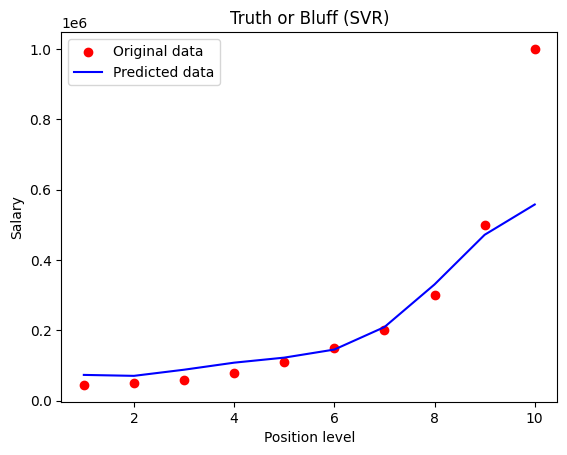

In [14]:
plt.scatter(X,Y,color="red",label="Original data")
plt.plot(X,y_predict,color="blue",label="Predicted data")
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-15-71e51e23d2db>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(X),max(X),0.1)


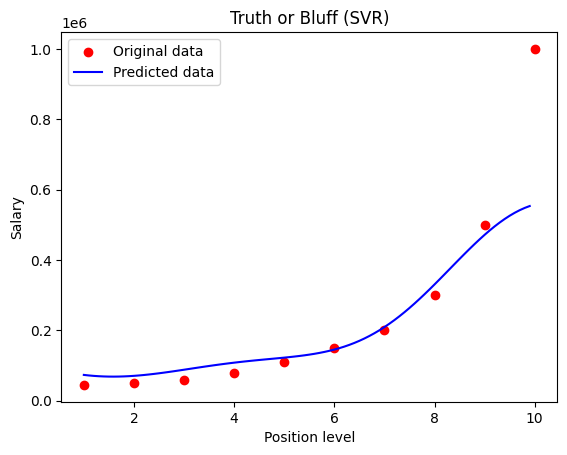

In [15]:
x_grid=np.arange(min(X),max(X),0.1)
x_grid=x_grid.reshape(-1,1)
plt.scatter(X,Y,color="red",label="Original data")
plt.plot(x_grid,y_sc.inverse_transform(svr.predict(x_sc.transform(x_grid)).reshape(-1,1)),color="blue",label="Predicted data")
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import r2_score
print("Model accuracy : ",r2_score(Y,y_predict))

Model accuracy :  0.7516001070620797
